In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import featuretools as ft

We took the NYC AirBnb data set we used in project 1

In [9]:
nyc = pd.read_csv("./data/AB_NYC_2019.csv")
nyc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


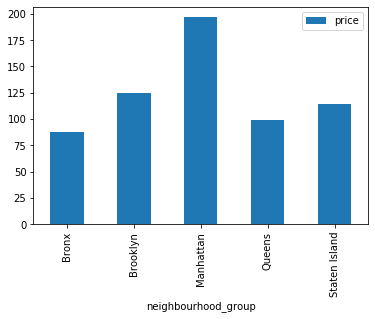

In [19]:
dfny = pd.DataFrame(nyc, columns = ['neighbourhood_group', 'price'])
ny_group = dfny.groupby('neighbourhood_group').mean()
ny_group.plot.bar()

There are some really unique values in this dataset and we can really paint a picture here that can be useful for the average consumer.

Up above you see some charts showing the average airbnb prices per a neighborhood. So you can clearly see that any home in manhattan can be 30-40 dollars on average more expensive than other neighborhoods.

Below you see a heatmap which tells us a story about the cost of certain homes as you zoom in and out.

In [11]:
from ipyleaflet import *
m = Map(center=(40.7128, -74.0060), zoom=10)

locations = pd.DataFrame(nyc, columns = ['latitude', 'longitude', 'price'])
heat = Heatmap(locations= locations.values.tolist(), radius=25, blur =10)
m.add_layer(heat)

heat.radius = 30
heat.blur = 50
heat.max = 0.5
heat.gradient = {0.4: 'red', 0.6: 'yellow', 0.7: 'lime', 0.8: 'cyan', 1.0: 'blue'}

m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

Here we have a correlation matrix that basically plots each of the attributes in our dataset and sees if there is a correlation between the two values. The higher the correlation the stronger the color is.

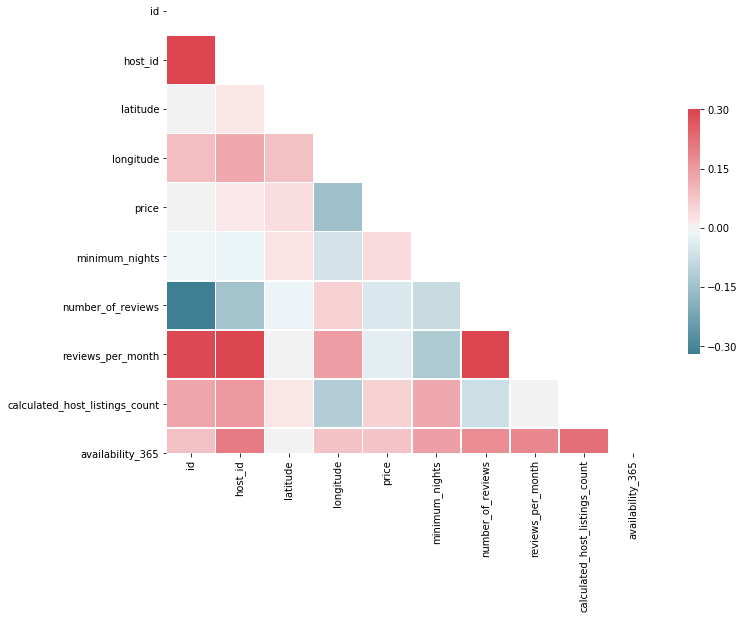

In [17]:
import seaborn as sns

# Compute the correlation matrix
corr = nyc.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Below you see the boxplot showing each of the neighborhood groups and the distribution of each.There are clearly some more outliers in manhattan as the more expensive airbnbs are probably there.

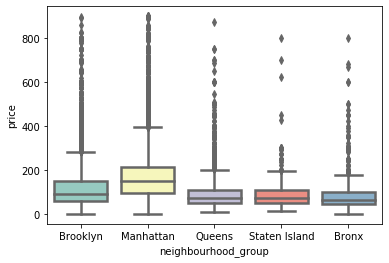

In [26]:
df = nyc[(nyc['price']<900)]

sns.boxplot('neighbourhood_group', 'price', data=df,palette="Set3", linewidth=2.5)